<a href="https://colab.research.google.com/github/HelsaAT/ProjectPPh2/blob/main/Project_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tolong buatkan python 3 dan buatkan analisis datanya berupa grafik yang berwarna, serta tolong analisis secara komprehensif dan valid

Here is all the data you need:
"dataset_gabungan_cleaned.csv"

## Data loading

### Subtask:
Load the dataset.


**Reasoning**:
Load the dataset and display the first 5 rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('dataset_gabungan_cleaned.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'dataset_gabungan_cleaned.csv' not found.")


,tahun,pendapatan,beban_operasional,penyusutan,skenario,laba_kotor,tax_rate,tax_holiday_status,pajak_terutang,kategori,jumlah_aset,total_nilai_perolehan,rata_rata_umur_ekonomis,total_penyusutan_tahunan
0,2020,1000000000,600000000,50000000,Optimis,350000000,0.25,Ya,0,Mesin,3,1800000000,6.0,300000000
1,2020,1000000000,600000000,50000000,Optimis,350000000,0.25,Ya,0,Kendaraan,2,700000000,4.0,250000000
2,2020,1000000000,600000000,50000000,Optimis,350000000,0.25,Ya,0,Bangunan,1,1000000000,20.0,50000000
3,2020,1000000000,600000000,50000000,Optimis,350000000,0.25,Ya,0,Peralatan,1,200000000,3.0,133333333
4,2020,1000000000,600000000,50000000,Optimis,350000000,0.25,Ya,0,Furniture,1,150000000,5.0,30000000


(60, 14)


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify data types, check for missing values, and examine the distribution of key variables. Determine the shape of the data and identify potential outliers.


**Reasoning**:
I need to explore the dataset's structure, identify data types, check for missing values, and examine the distribution of key variables to understand the data.



Data Types:
tahun                         int64
pendapatan                    int64
beban_operasional             int64
penyusutan                    int64
skenario                     object
laba_kotor                    int64
tax_rate                    float64
tax_holiday_status           object
pajak_terutang                int64
kategori                     object
jumlah_aset                   int64
total_nilai_perolehan         int64
rata_rata_umur_ekonomis     float64
total_penyusutan_tahunan      int64
dtype: object

Unique values in 'skenario':
['Optimis' 'Pessimis' 'Normal']
Number of unique values in 'skenario': 3

Unique values in 'tax_holiday_status':
['Ya' 'Tidak']
Number of unique values in 'tax_holiday_status': 2

Unique values in 'kategori':
['Mesin' 'Kendaraan' 'Bangunan' 'Peralatan' 'Furniture']
Number of unique values in 'kategori': 5

Missing Values:
tahun                       0
pendapatan                  0
beban_operasional           0
penyusutan                

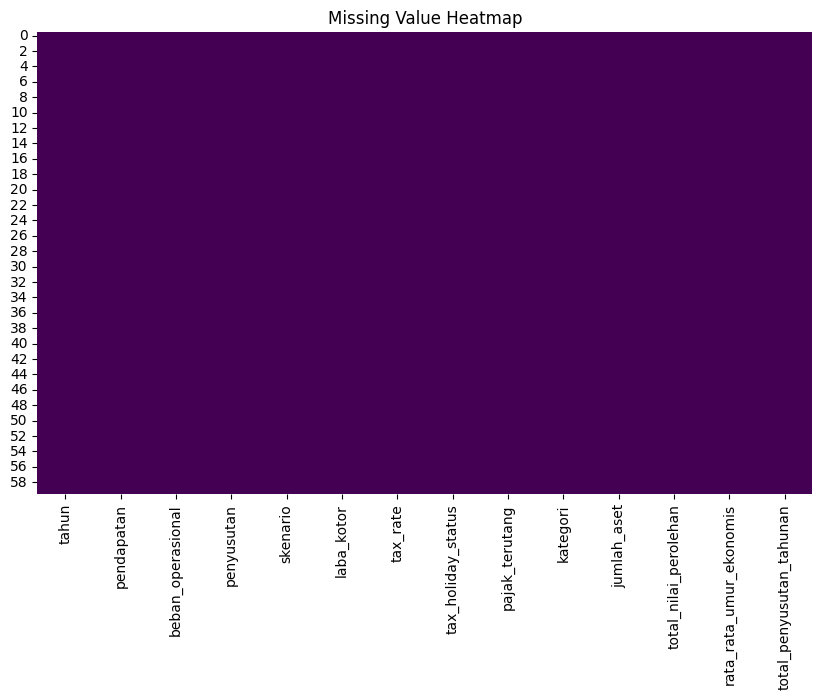

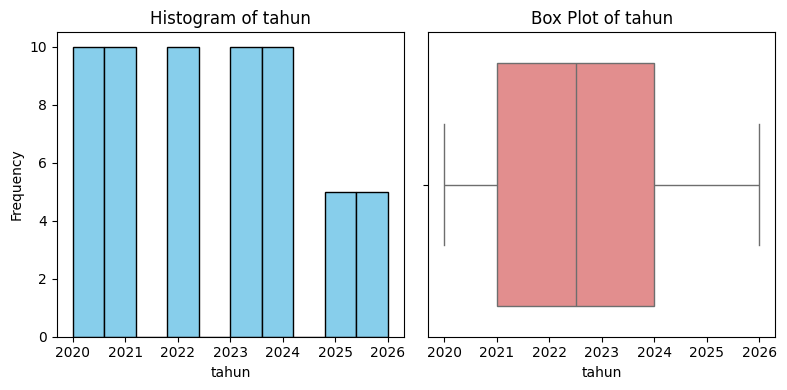

Outliers in tahun: 0


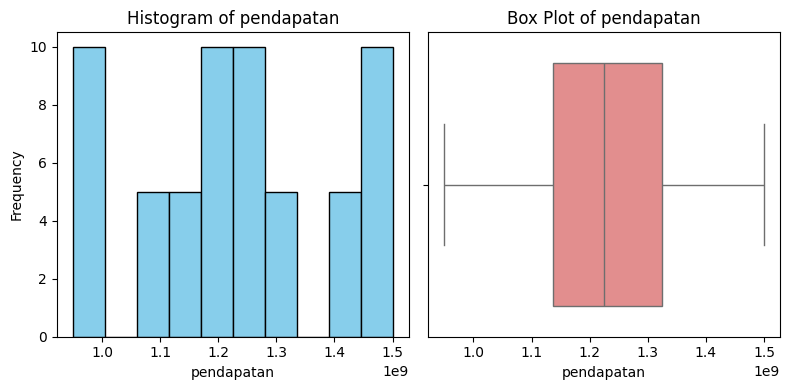

Outliers in pendapatan: 0


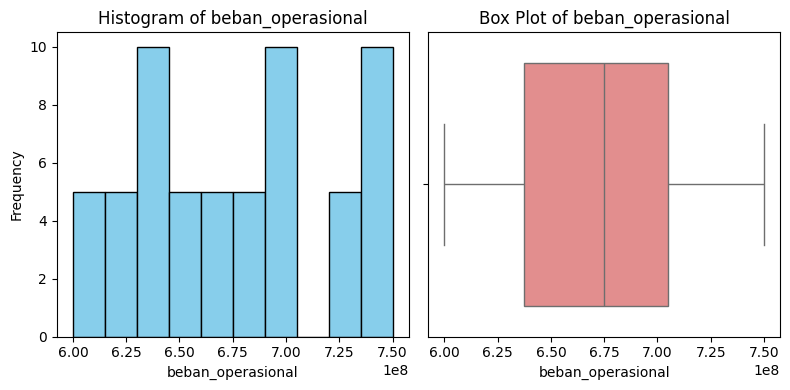

Outliers in beban_operasional: 0


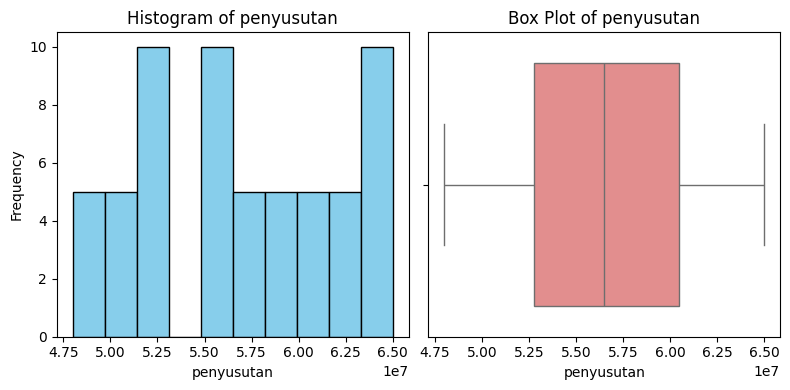

Outliers in penyusutan: 0


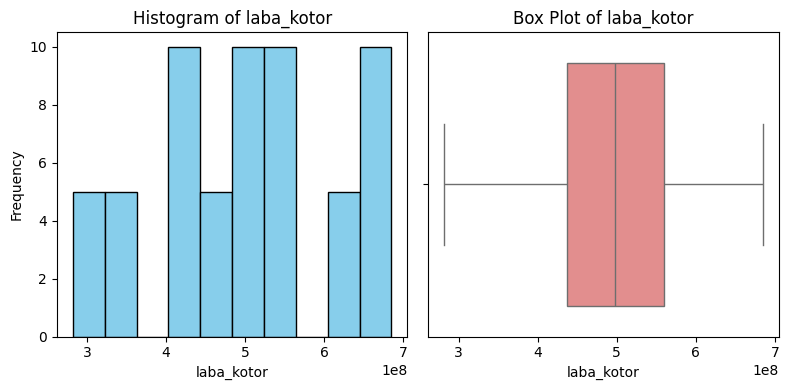

Outliers in laba_kotor: 0


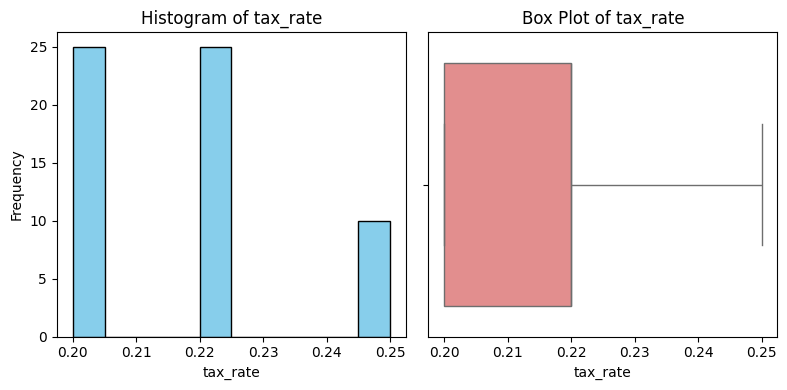

Outliers in tax_rate: 0


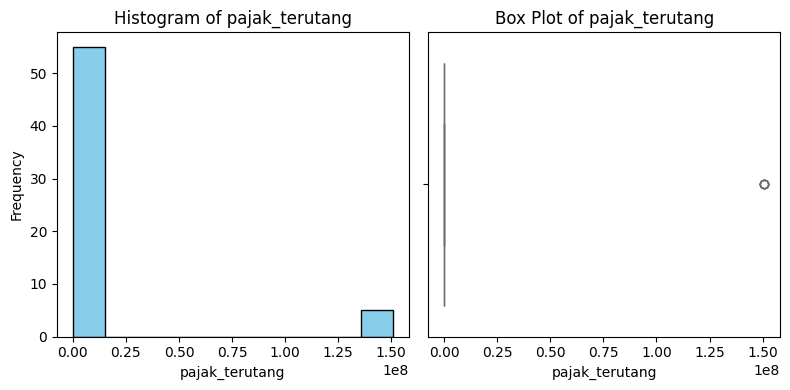

Outliers in pajak_terutang: 5


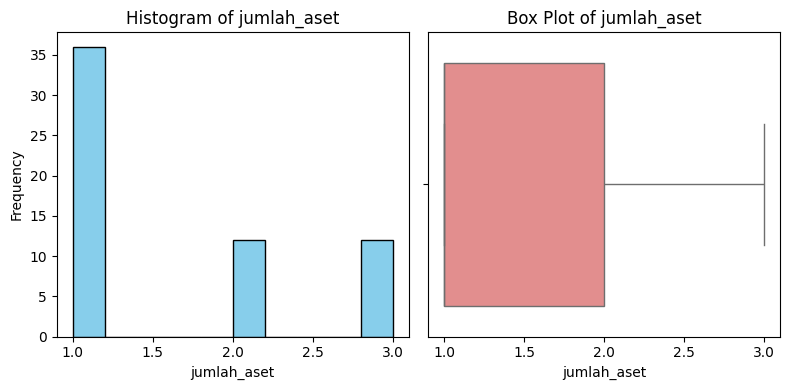

Outliers in jumlah_aset: 0


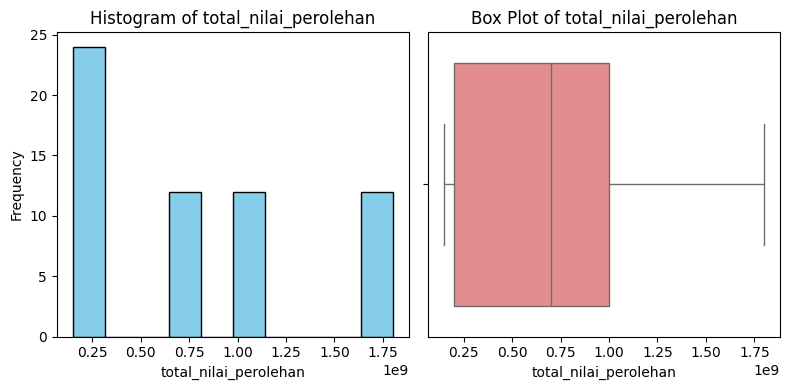

Outliers in total_nilai_perolehan: 0


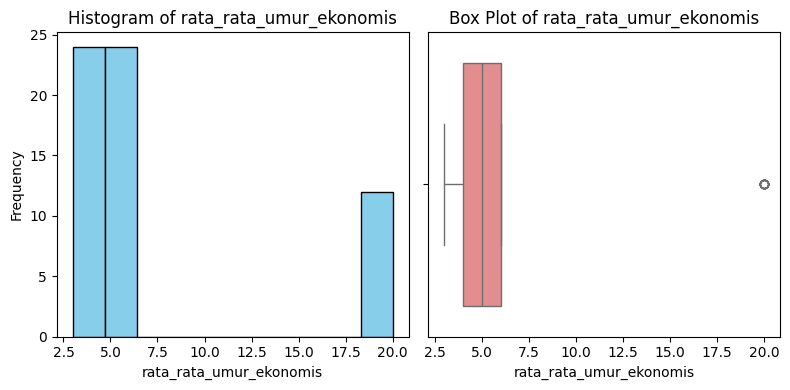

Outliers in rata_rata_umur_ekonomis: 12


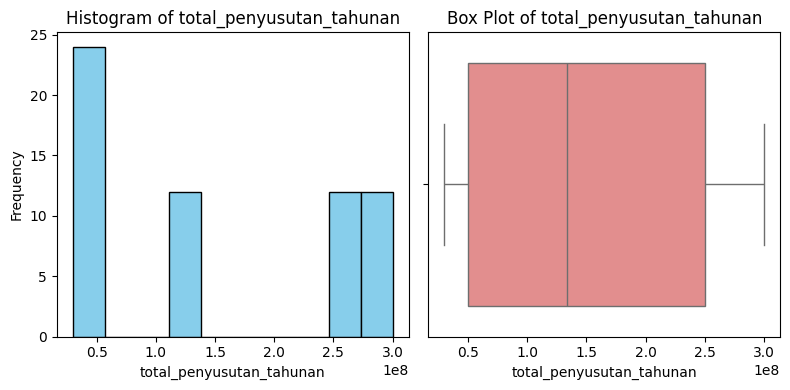

Outliers in total_penyusutan_tahunan: 0

Descriptive Statistics:
             tahun    pendapatan  beban_operasional    penyusutan  \
count    60.000000  6.000000e+01       6.000000e+01  6.000000e+01   
mean   2022.583333  1.231667e+09       6.750000e+08  5.683333e+07   
std       1.862126  1.693374e+08       4.756797e+07  5.380967e+06   
min    2020.000000  9.500000e+08       6.000000e+08  4.800000e+07   
25%    2021.000000  1.137500e+09       6.375000e+08  5.275000e+07   
50%    2022.500000  1.225000e+09       6.750000e+08  5.650000e+07   
75%    2024.000000  1.325000e+09       7.050000e+08  6.050000e+07   
max    2026.000000  1.500000e+09       7.500000e+08  6.500000e+07   

         laba_kotor   tax_rate  pajak_terutang  jumlah_aset  \
count  6.000000e+01  60.000000    6.000000e+01    60.000000   
mean   4.998333e+08   0.216667    1.255833e+07     1.600000   
std    1.187583e+08   0.017628    4.200277e+07     0.806751   
min    2.820000e+08   0.200000    0.000000e+00     1.000000  

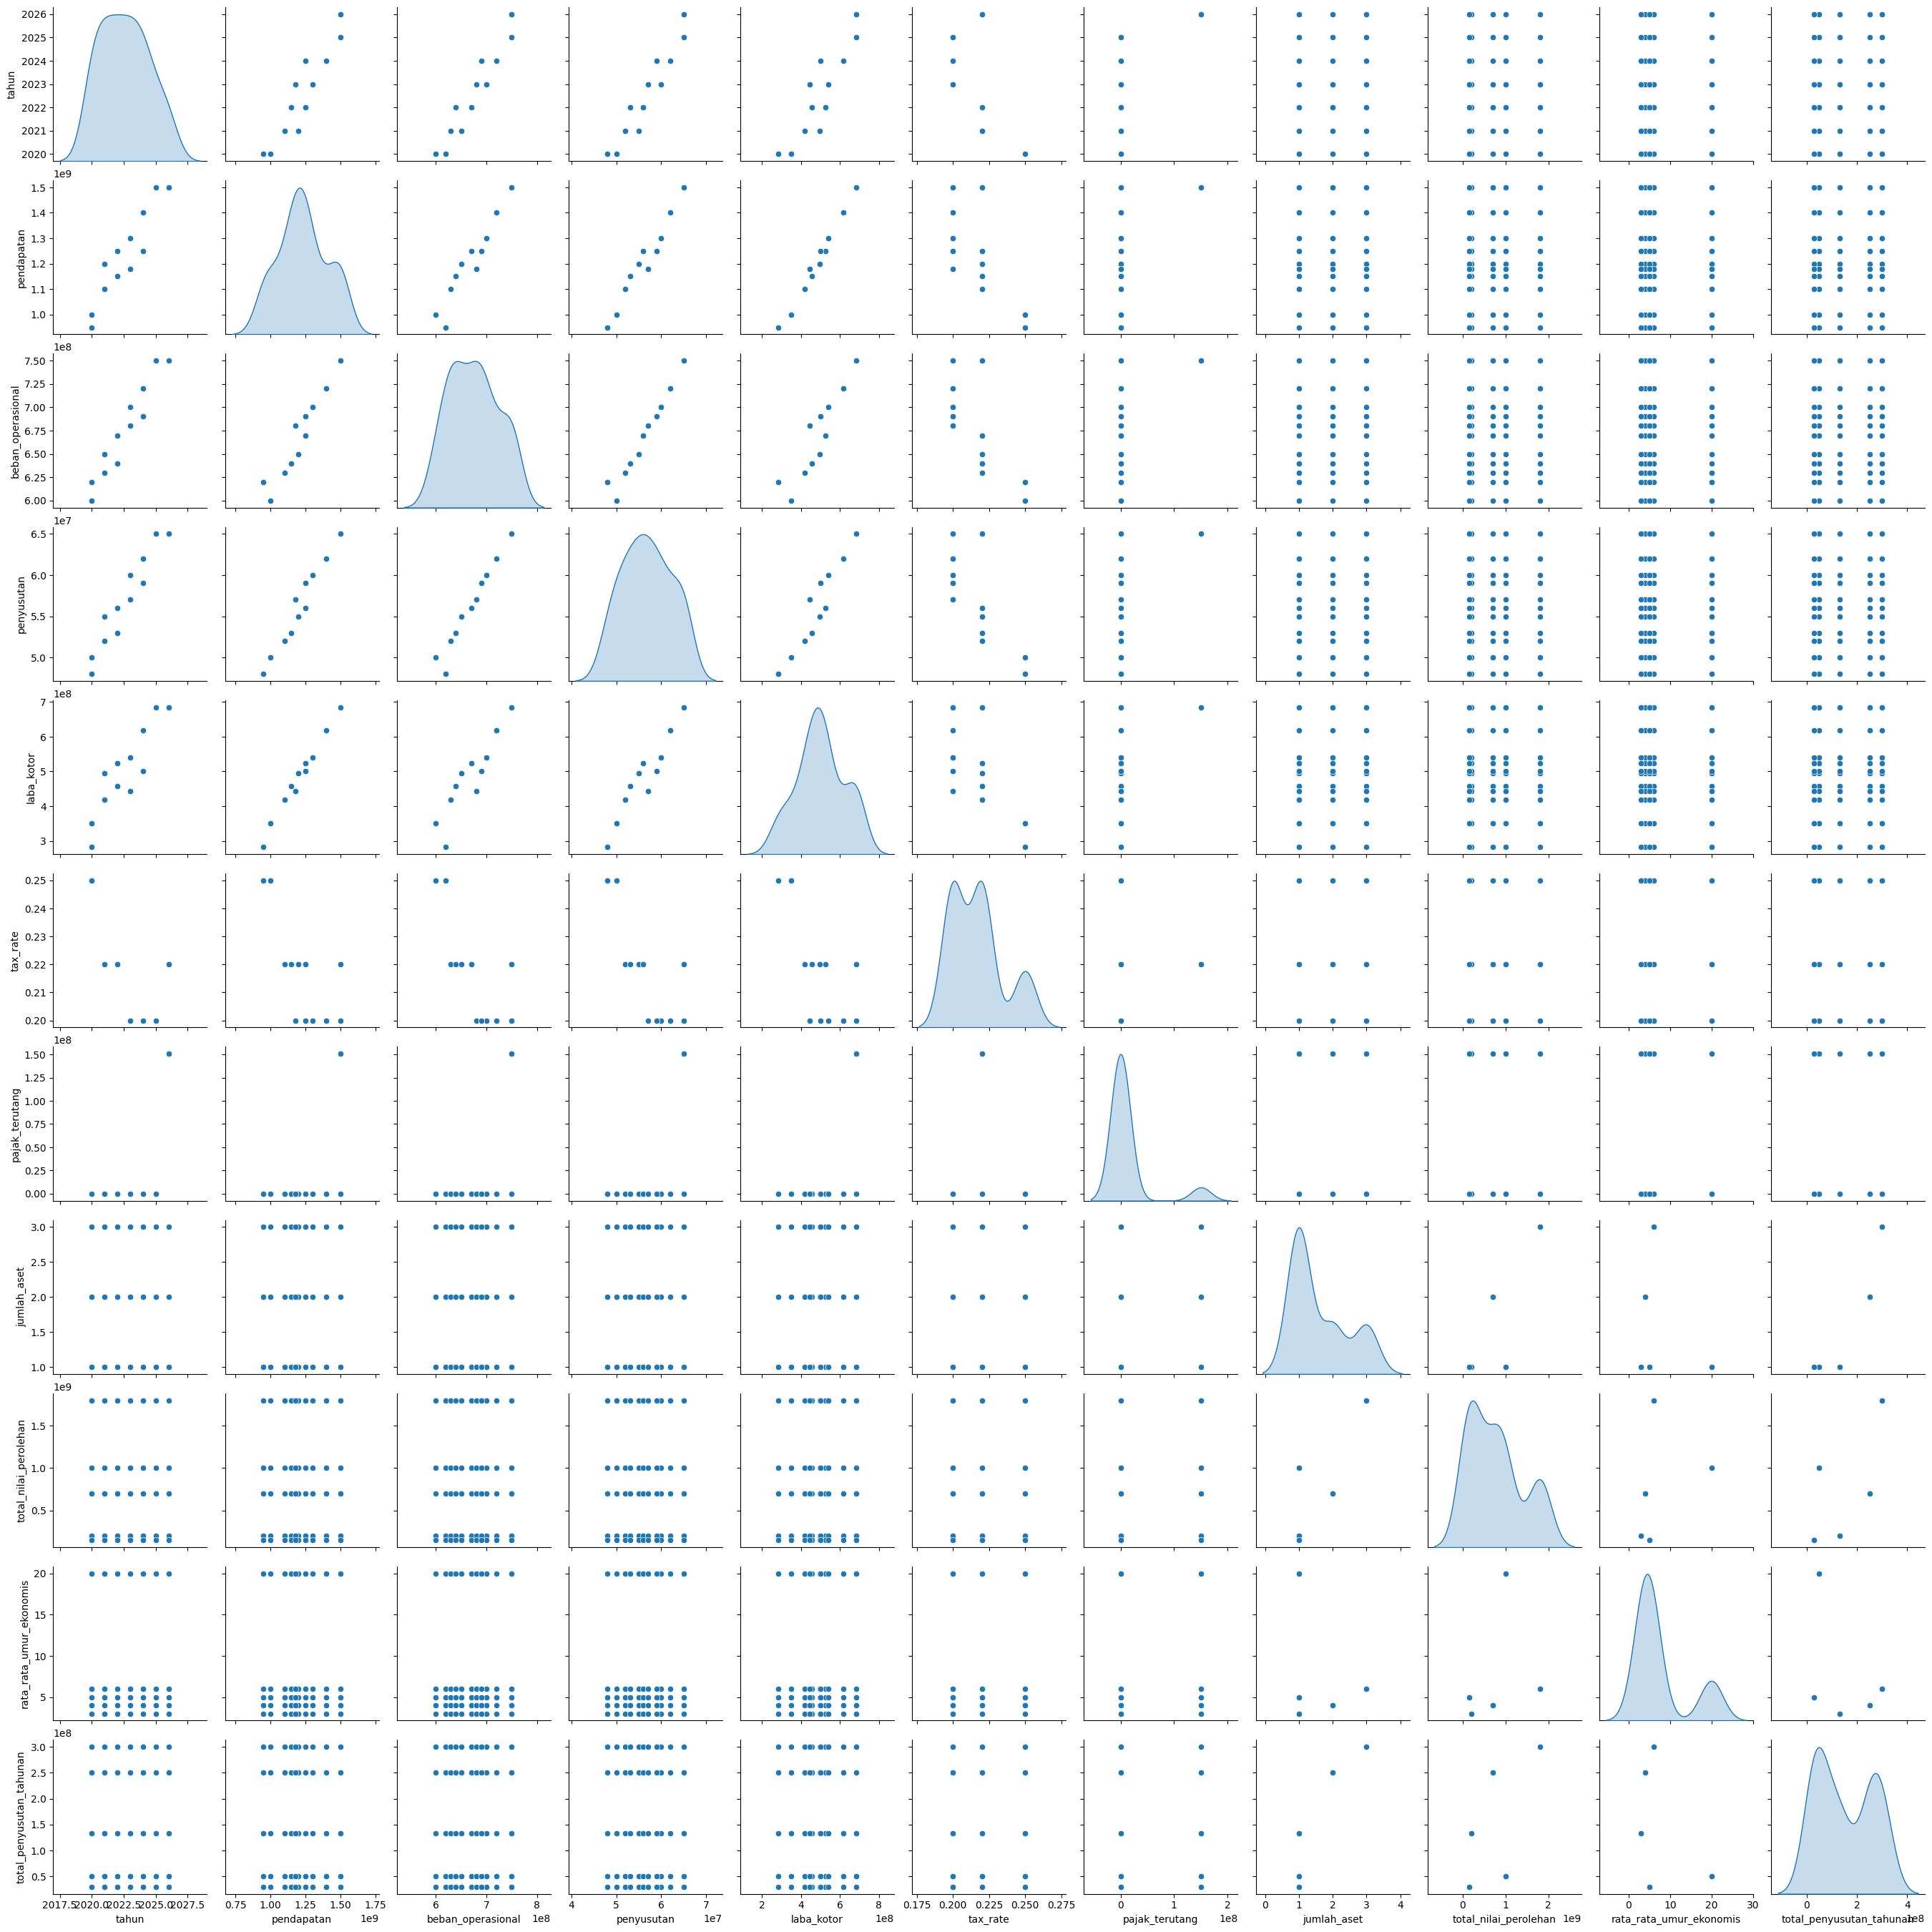

In [2]:
# Examine data types and unique values
print("Data Types:")
print(df.dtypes)
for col in df.select_dtypes(include=['object', 'category']):
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())
    print(f"Number of unique values in '{col}': {df[col].nunique()}")

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_values)
print(missing_percentage)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

# Analyze distribution of numerical features
numerical_features = df.select_dtypes(include=['number'])
for col in numerical_features.columns:
    plt.figure(figsize=(8, 4))  # Adjust figure size as needed
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    # Quantify outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")

# Calculate descriptive statistics
print("\nDescriptive Statistics:")
print(numerical_features.describe())

# Explore relationships between numerical features
sns.pairplot(numerical_features, diag_kind="kde")
plt.show()


## Data cleaning

### Subtask:
Clean the data by handling outliers in 'pajak_terutang' and 'rata_rata_umur_ekonomis'.


**Reasoning**:
Handle outliers in 'pajak_terutang' and 'rata_rata_umur_ekonomis' by replacing them with the median value of each column. Then, verify the outlier handling using box plots.



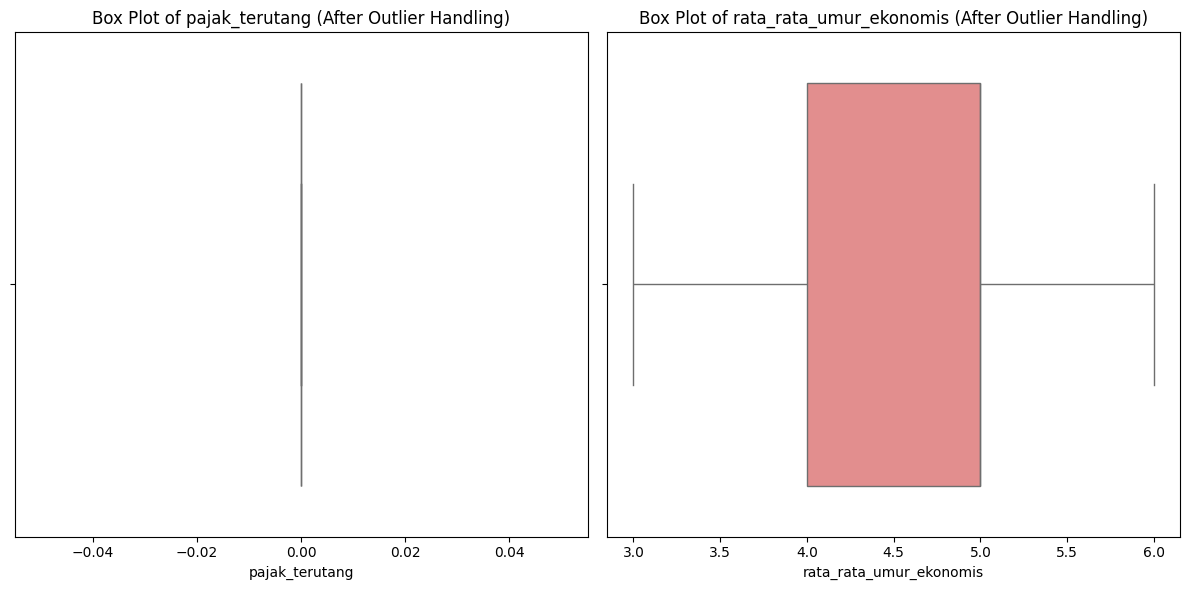

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median for 'pajak_terutang' and 'rata_rata_umur_ekonomis'
median_pajak = df['pajak_terutang'].median()
median_umur = df['rata_rata_umur_ekonomis'].median()

# Replace outliers with the median
Q1_pajak = df['pajak_terutang'].quantile(0.25)
Q3_pajak = df['pajak_terutang'].quantile(0.75)
IQR_pajak = Q3_pajak - Q1_pajak
lower_bound_pajak = Q1_pajak - 1.5 * IQR_pajak
upper_bound_pajak = Q3_pajak + 1.5 * IQR_pajak
df.loc[(df['pajak_terutang'] < lower_bound_pajak) | (df['pajak_terutang'] > upper_bound_pajak), 'pajak_terutang'] = median_pajak

Q1_umur = df['rata_rata_umur_ekonomis'].quantile(0.25)
Q3_umur = df['rata_rata_umur_ekonomis'].quantile(0.75)
IQR_umur = Q3_umur - Q1_umur
lower_bound_umur = Q1_umur - 1.5 * IQR_umur
upper_bound_umur = Q3_umur + 1.5 * IQR_umur
df.loc[(df['rata_rata_umur_ekonomis'] < lower_bound_umur) | (df['rata_rata_umur_ekonomis'] > upper_bound_umur), 'rata_rata_umur_ekonomis'] = median_umur


# Verify outlier handling with box plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['pajak_terutang'], color='skyblue')
plt.title("Box Plot of pajak_terutang (After Outlier Handling)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['rata_rata_umur_ekonomis'], color='lightcoral')
plt.title("Box Plot of rata_rata_umur_ekonomis (After Outlier Handling)")

plt.tight_layout()
plt.show()

## Data wrangling

### Subtask:
Prepare the data for analysis and visualization.


**Reasoning**:
Convert the 'tahun' column to datetime objects, check and convert data types of other columns, create new features, and scale numerical features.



In [4]:
import pandas as pd

# Convert 'tahun' to datetime objects
df['tahun'] = pd.to_datetime(df['tahun'], format='%Y')

# Check and convert data types
for col in ['pendapatan', 'beban_operasional', 'penyusutan', 'laba_kotor', 'pajak_terutang', 'jumlah_aset', 'total_nilai_perolehan', 'rata_rata_umur_ekonomis', 'total_penyusutan_tahunan']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create new features
# Profitability ratio: laba_kotor / pendapatan
df['profitability_ratio'] = df['laba_kotor'] / df['pendapatan']

# Asset Turnover Ratio: pendapatan / jumlah_aset
df['asset_turnover_ratio'] = df['pendapatan'] / df['jumlah_aset']


# Scale numerical features using min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['pendapatan', 'beban_operasional', 'penyusutan', 'laba_kotor', 'pajak_terutang', 'jumlah_aset',
                  'total_nilai_perolehan', 'rata_rata_umur_ekonomis', 'total_penyusutan_tahunan', 'profitability_ratio', 'asset_turnover_ratio']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


display(df.head())
print(df.dtypes)

,tahun,pendapatan,beban_operasional,penyusutan,skenario,laba_kotor,tax_rate,tax_holiday_status,pajak_terutang,kategori,jumlah_aset,total_nilai_perolehan,rata_rata_umur_ekonomis,total_penyusutan_tahunan,profitability_ratio,asset_turnover_ratio
0,2020-01-01,0.090909,0.0,0.117647,Optimis,0.168734,0.25,Ya,0.0,Mesin,1.0,1.000000,1.000000,1.000000,0.332602,0.014085
1,2020-01-01,0.090909,0.0,0.117647,Optimis,0.168734,0.25,Ya,0.0,Kendaraan,0.5,0.333333,0.333333,0.814815,0.332602,0.154930
2,2020-01-01,0.090909,0.0,0.117647,Optimis,0.168734,0.25,Ya,0.0,Bangunan,0.0,0.515152,0.666667,0.074074,0.332602,0.577465
3,2020-01-01,0.090909,0.0,0.117647,Optimis,0.168734,0.25,Ya,0.0,Peralatan,0.0,0.030303,0.000000,0.382716,0.332602,0.577465
4,2020-01-01,0.090909,0.0,0.117647,Optimis,0.168734,0.25,Ya,0.0,Furniture,0.0,0.000000,0.666667,0.000000,0.332602,0.577465


tahun                       datetime64[ns]
pendapatan                         float64
beban_operasional                  float64
penyusutan                         float64
skenario                            object
laba_kotor                         float64
tax_rate                           float64
tax_holiday_status                  object
pajak_terutang                     float64
kategori                            object
jumlah_aset                        float64
total_nilai_perolehan              float64
rata_rata_umur_ekonomis            float64
total_penyusutan_tahunan           float64
profitability_ratio                float64
asset_turnover_ratio               float64
dtype: object


## Data analysis

### Subtask:
Analyze the prepared data to identify key relationships, trends, and patterns.


**Reasoning**:
Calculate descriptive statistics, analyze correlations, investigate relationships between engineered features and other variables, analyze trends over time, and explore relationships between categorical and numerical variables.



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
print("Descriptive Statistics:\n", df.describe())

# 2. Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# 3. Relationship between engineered features and other variables
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pendapatan', y='profitability_ratio', data=df, hue='kategori', palette='viridis')
plt.title('Profitability Ratio vs. Pendapatan')

plt.subplot(1, 2, 2)
sns.scatterplot(x='jumlah_aset', y='asset_turnover_ratio', data=df, hue='kategori', palette='magma')
plt.title('Asset Turnover Ratio vs. Jumlah Aset')
plt.tight_layout()
plt.show()


# 4. Trends over time
plt.figure(figsize=(10, 6))
df.groupby('tahun')['pendapatan'].mean().plot(marker='o', linestyle='-')
plt.title('Average Pendapatan over Time')
plt.xlabel('Year')
plt.ylabel('Average Pendapatan')
plt.show()

# 5. Relationships between categorical and numerical variables
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='skenario', y='pendapatan', data=df, palette='Set3')
plt.title('Pendapatan by Skenario')

plt.subplot(1, 2, 2)
sns.boxplot(x='kategori', y='laba_kotor', data=df, palette='Set2')
plt.title('Laba Kotor by Kategori')
plt.tight_layout()
plt.show()

print(df.groupby('skenario')['pendapatan'].describe())
print(df.groupby('kategori')['laba_kotor'].describe())

Descriptive Statistics:
                      tahun  pendapatan  beban_operasional  penyusutan  \
count                   60   60.000000           60.00000   60.000000   
mean   2022-08-01 22:00:00    0.512121            0.50000    0.519608   
min    2020-01-01 00:00:00    0.000000            0.00000    0.000000   
25%    2021-01-01 00:00:00    0.340909            0.25000    0.279412   
50%    2022-07-02 12:00:00    0.500000            0.50000    0.500000   
75%    2024-01-01 00:00:00    0.681818            0.70000    0.735294   
max    2026-01-01 00:00:00    1.000000            1.00000    1.000000   
std                    NaN    0.307886            0.31712    0.316527   

       laba_kotor   tax_rate  pajak_terutang  jumlah_aset  \
count   60.000000  60.000000            60.0    60.000000   
mean     0.540529   0.216667             0.0     0.300000   
min      0.000000   0.200000             0.0     0.000000   
25%      0.383995   0.200000             0.0     0.000000   
50%      0.5

ValueError: could not convert string to float: 'Optimis'

**Reasoning**:
The previous code failed due to a `ValueError` when converting a string to a float. This suggests that there are non-numeric values in columns that should be numeric.  I need to identify and handle these values before attempting correlation analysis.  I will convert the relevant columns to numeric types, coercing errors to NaN, which can be handled by the correlation function.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert relevant columns to numeric, coercing errors to NaN
for col in ['pendapatan', 'beban_operasional', 'penyusutan', 'laba_kotor', 'pajak_terutang', 'jumlah_aset', 'total_nilai_perolehan', 'rata_rata_umur_ekonomis', 'total_penyusutan_tahunan', 'profitability_ratio', 'asset_turnover_ratio']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Recalculate descriptive statistics after handling the error
print("Descriptive Statistics:\n", df.describe())

# 2. Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# 3. Relationship between engineered features and other variables
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pendapatan', y='profitability_ratio', data=df, hue='kategori', palette='viridis')
plt.title('Profitability Ratio vs. Pendapatan')

plt.subplot(1, 2, 2)
sns.scatterplot(x='jumlah_aset', y='asset_turnover_ratio', data=df, hue='kategori', palette='magma')
plt.title('Asset Turnover Ratio vs. Jumlah Aset')
plt.tight_layout()
plt.show()


# 4. Trends over time
plt.figure(figsize=(10, 6))
df.groupby('tahun')['pendapatan'].mean().plot(marker='o', linestyle='-')
plt.title('Average Pendapatan over Time')
plt.xlabel('Year')
plt.ylabel('Average Pendapatan')
plt.show()

# 5. Relationships between categorical and numerical variables
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='skenario', y='pendapatan', data=df, palette='Set3')
plt.title('Pendapatan by Skenario')

plt.subplot(1, 2, 2)
sns.boxplot(x='kategori', y='laba_kotor', data=df, palette='Set2')
plt.title('Laba Kotor by Kategori')
plt.tight_layout()
plt.show()

print(df.groupby('skenario')['pendapatan'].describe())
print(df.groupby('kategori')['laba_kotor'].describe())

Descriptive Statistics:
                      tahun  pendapatan  beban_operasional  penyusutan  \
count                   60   60.000000           60.00000   60.000000   
mean   2022-08-01 22:00:00    0.512121            0.50000    0.519608   
min    2020-01-01 00:00:00    0.000000            0.00000    0.000000   
25%    2021-01-01 00:00:00    0.340909            0.25000    0.279412   
50%    2022-07-02 12:00:00    0.500000            0.50000    0.500000   
75%    2024-01-01 00:00:00    0.681818            0.70000    0.735294   
max    2026-01-01 00:00:00    1.000000            1.00000    1.000000   
std                    NaN    0.307886            0.31712    0.316527   

       laba_kotor   tax_rate  pajak_terutang  jumlah_aset  \
count   60.000000  60.000000            60.0    60.000000   
mean     0.540529   0.216667             0.0     0.300000   
min      0.000000   0.200000             0.0     0.000000   
25%      0.383995   0.200000             0.0     0.000000   
50%      0.5

ValueError: could not convert string to float: 'Optimis'

**Reasoning**:
The error persists, indicating that the to_numeric conversion is not correctly handling all non-numeric values. I will inspect the data types again and handle any remaining string values in the numeric columns.



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect data types to identify any remaining string columns
print(df.dtypes)

# Further attempt to convert to numeric, coercing errors
for col in ['pendapatan', 'beban_operasional', 'penyusutan', 'laba_kotor', 'pajak_terutang', 'jumlah_aset', 'total_nilai_perolehan', 'rata_rata_umur_ekonomis', 'total_penyusutan_tahunan', 'profitability_ratio', 'asset_turnover_ratio']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Recalculate descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Now try the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# ... (rest of the code remains the same)

tahun                       datetime64[ns]
pendapatan                         float64
beban_operasional                  float64
penyusutan                         float64
skenario                            object
laba_kotor                         float64
tax_rate                           float64
tax_holiday_status                  object
pajak_terutang                     float64
kategori                            object
jumlah_aset                        float64
total_nilai_perolehan              float64
rata_rata_umur_ekonomis            float64
total_penyusutan_tahunan           float64
profitability_ratio                float64
asset_turnover_ratio               float64
dtype: object

Descriptive Statistics:
                      tahun  pendapatan  beban_operasional  penyusutan  \
count                   60   60.000000           60.00000   60.000000   
mean   2022-08-01 22:00:00    0.512121            0.50000    0.519608   
min    2020-01-01 00:00:00    0.000000            0.0

ValueError: could not convert string to float: 'Optimis'

**Reasoning**:
The error "ValueError: could not convert string to float: 'Optimis'" indicates that the 'skenario' column, which should be categorical, contains values that are preventing the numerical columns from being converted.  I need to exclude non-numeric columns from the correlation analysis.



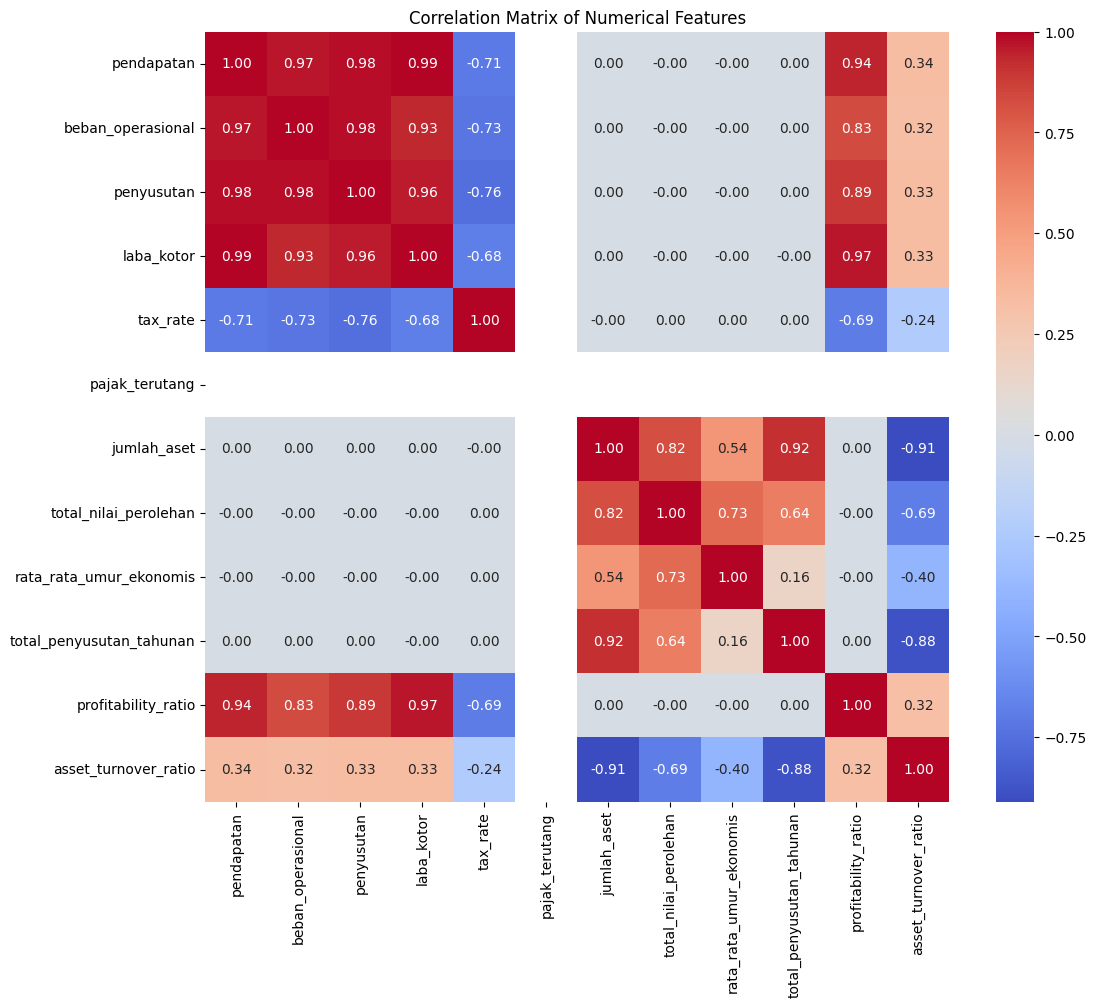

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# ... (rest of the analysis code)

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Visualize the data using a correlation matrix heatmap, time series plot, box plots, and scatter plots as instructed.



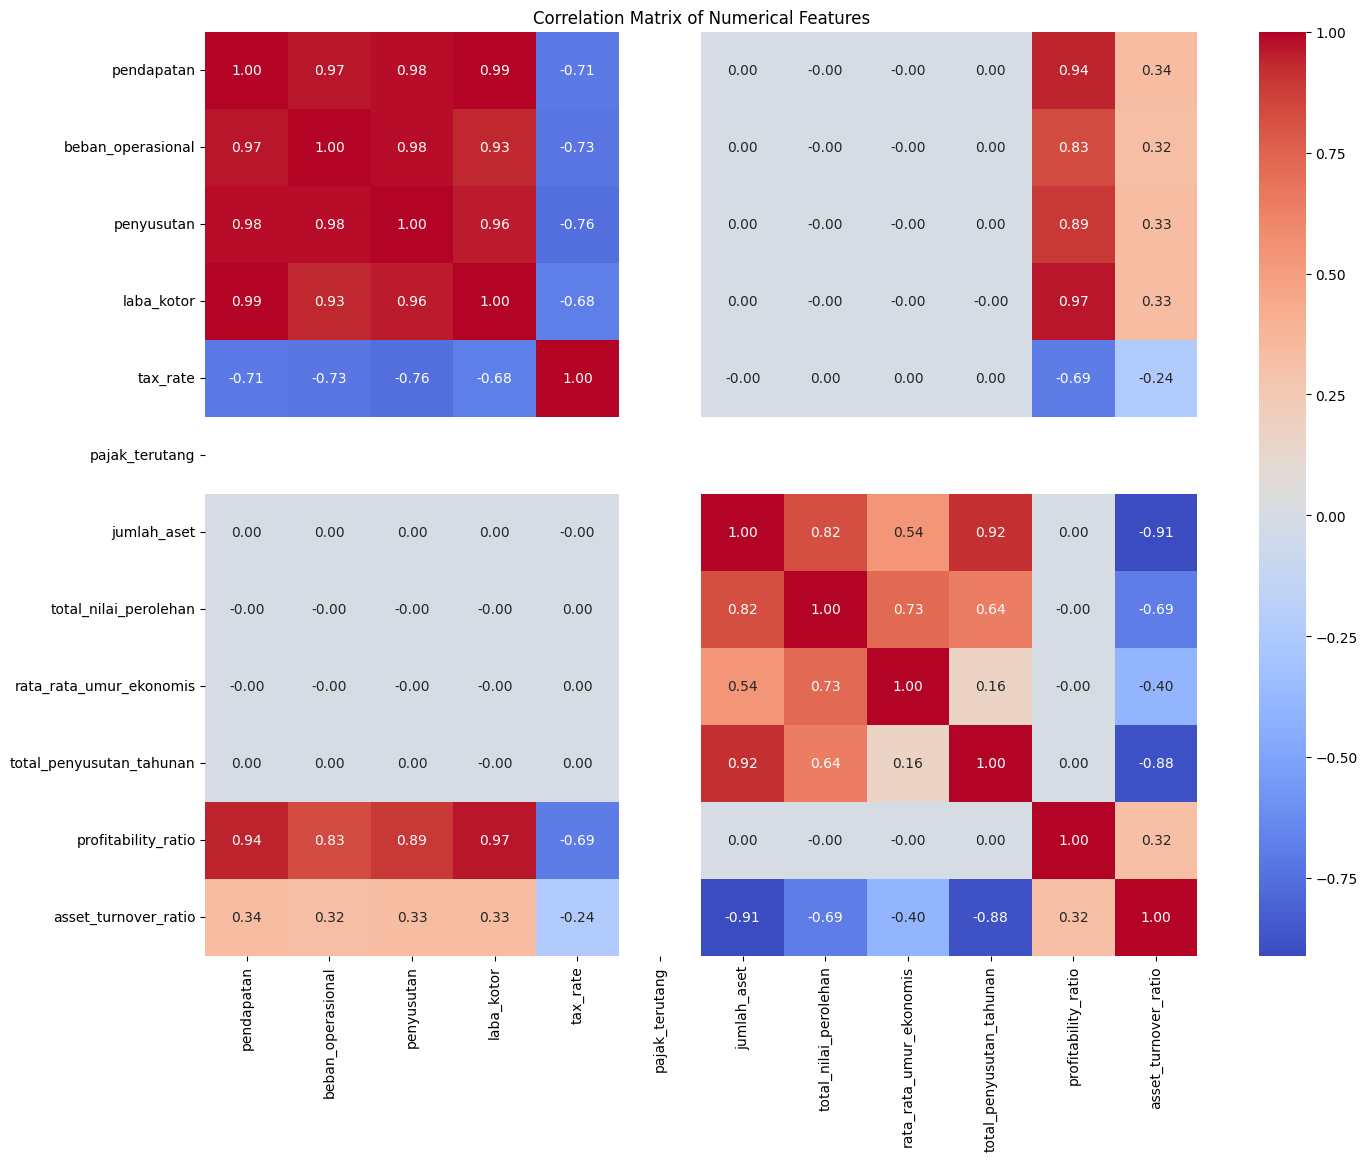

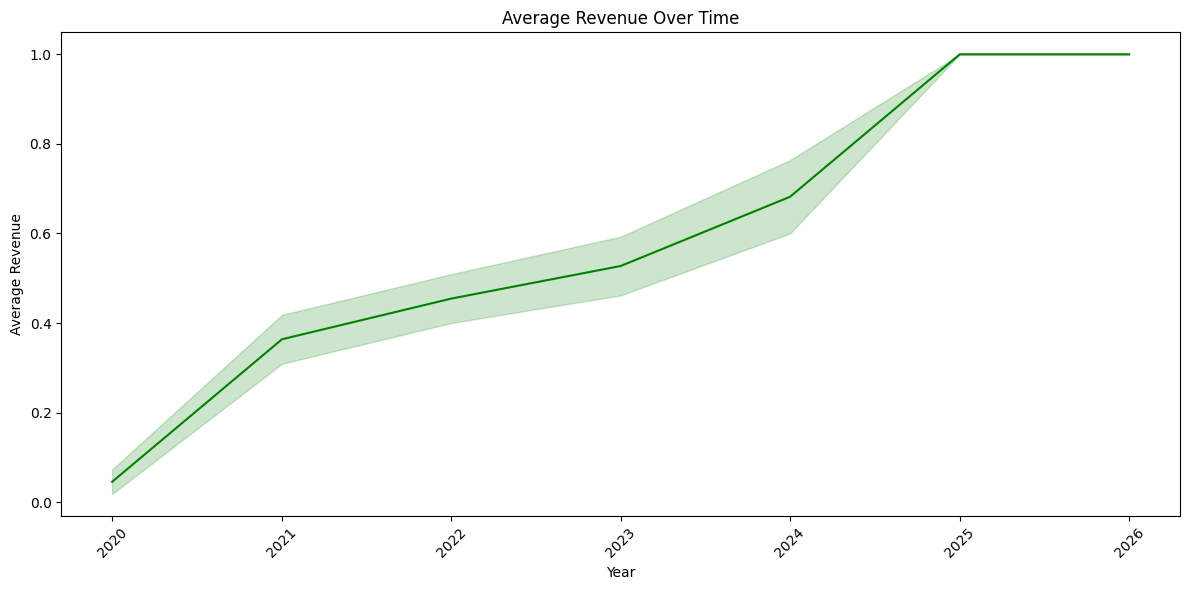

<ipython-input-9-99bb3f81d9e7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='pendapatan', data=df, palette='Set3')
<ipython-input-9-99bb3f81d9e7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='pendapatan', data=df, palette='Set3')
<ipython-input-9-99bb3f81d9e7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='pendapatan', data=df, palette='Set3')


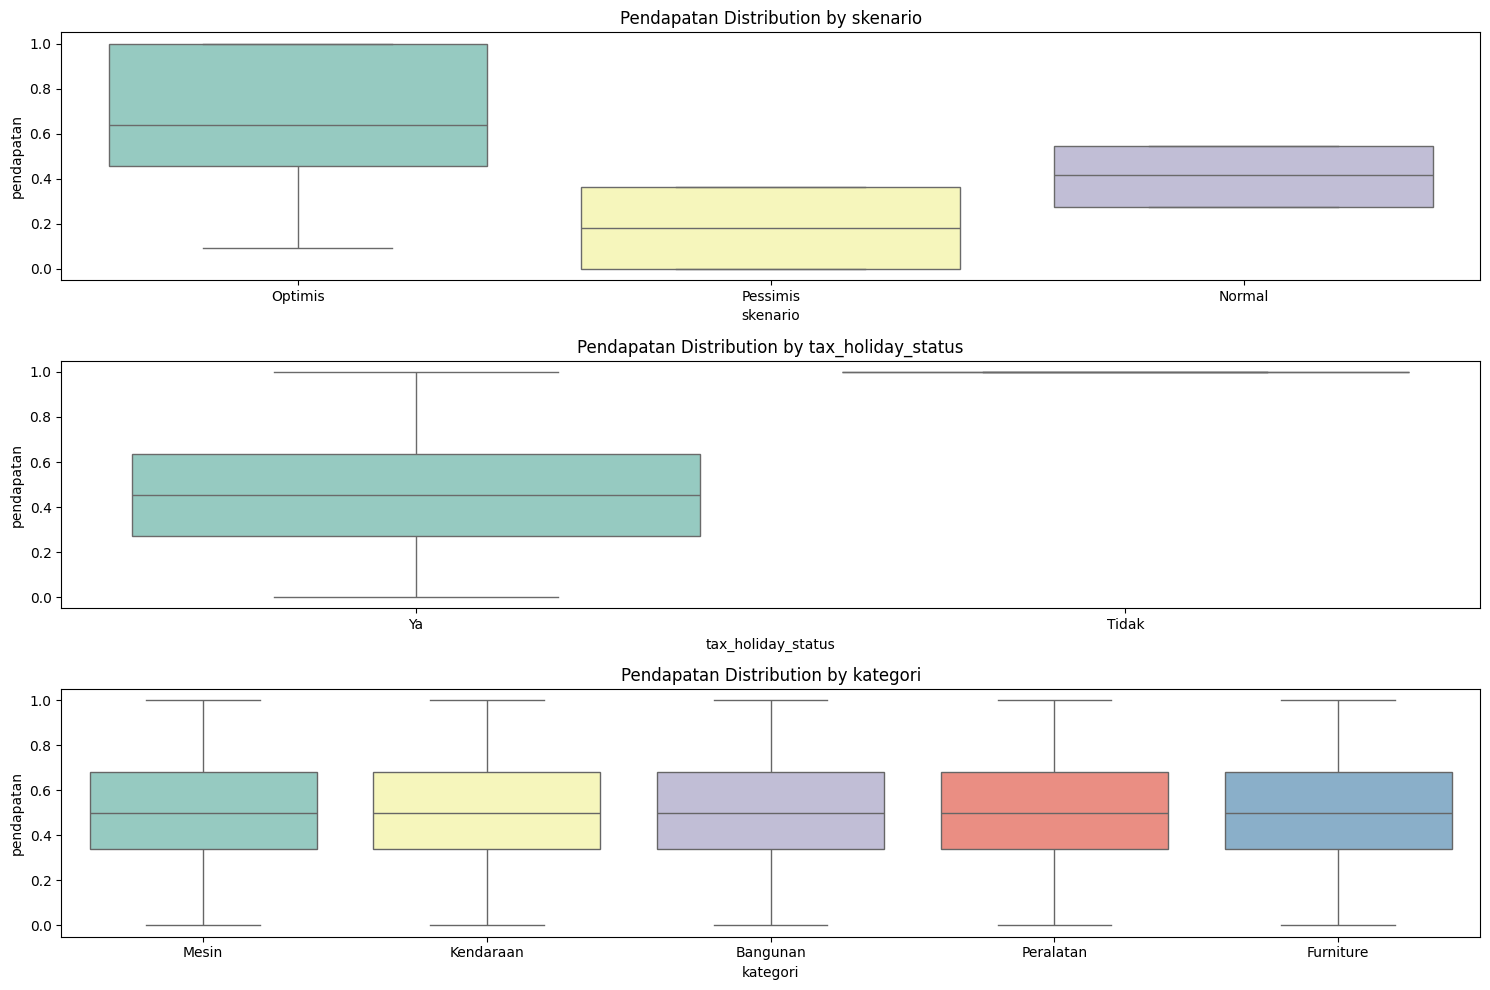

<ipython-input-9-99bb3f81d9e7>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='laba_kotor', data=df, palette='Set3')
<ipython-input-9-99bb3f81d9e7>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='laba_kotor', data=df, palette='Set3')
<ipython-input-9-99bb3f81d9e7>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='laba_kotor', data=df, palette='Set3')


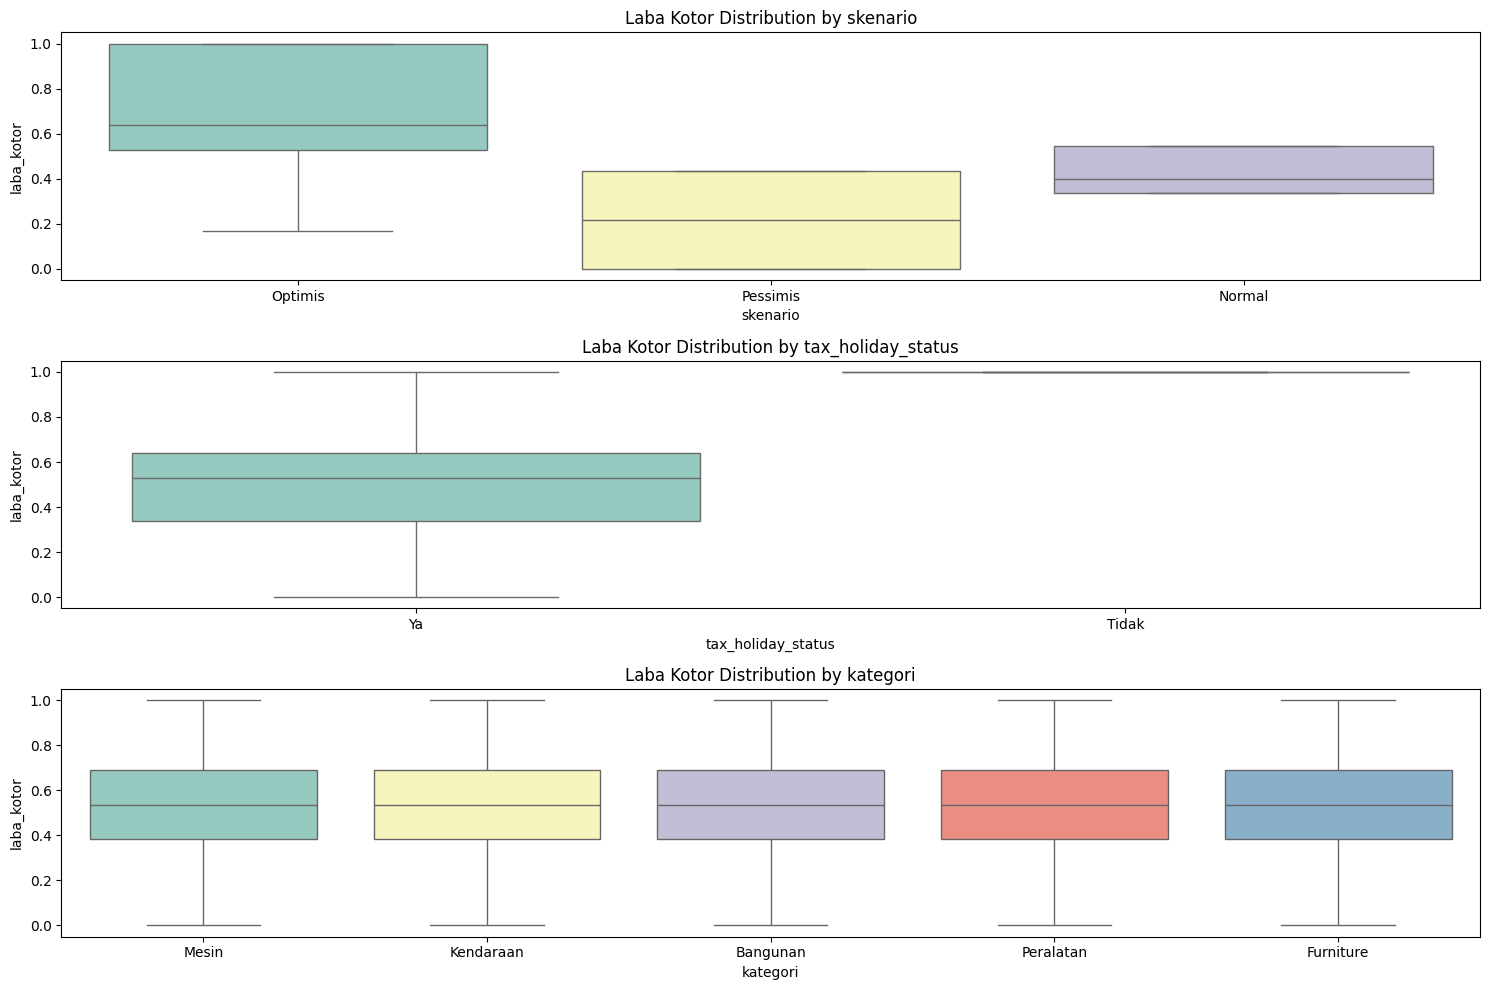

<ipython-input-9-99bb3f81d9e7>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='jumlah_aset', data=df, palette='Set3')
<ipython-input-9-99bb3f81d9e7>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='jumlah_aset', data=df, palette='Set3')
<ipython-input-9-99bb3f81d9e7>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='jumlah_aset', data=df, palette='Set3')


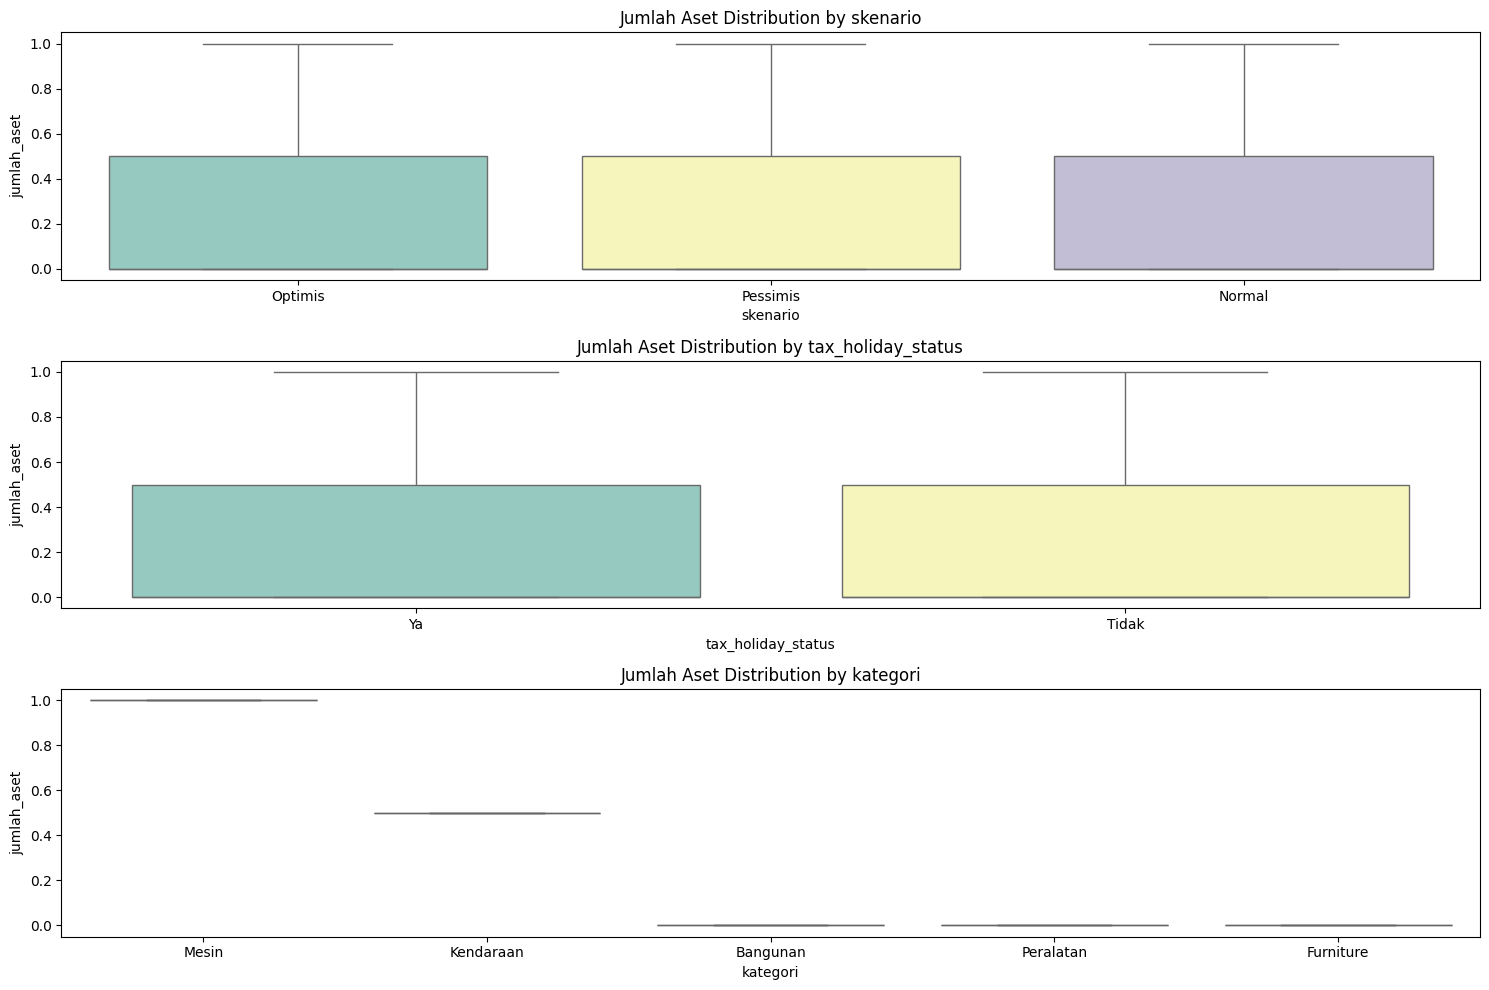

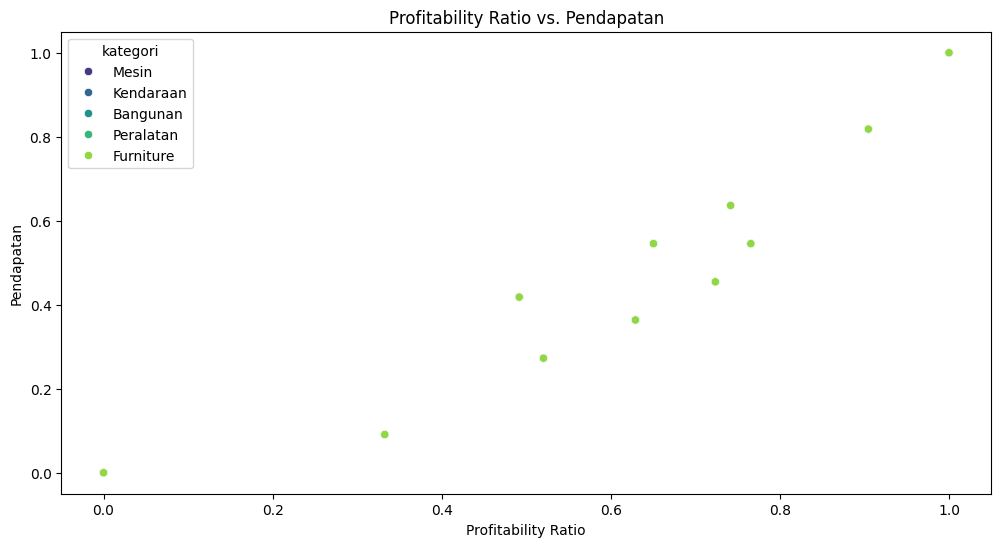

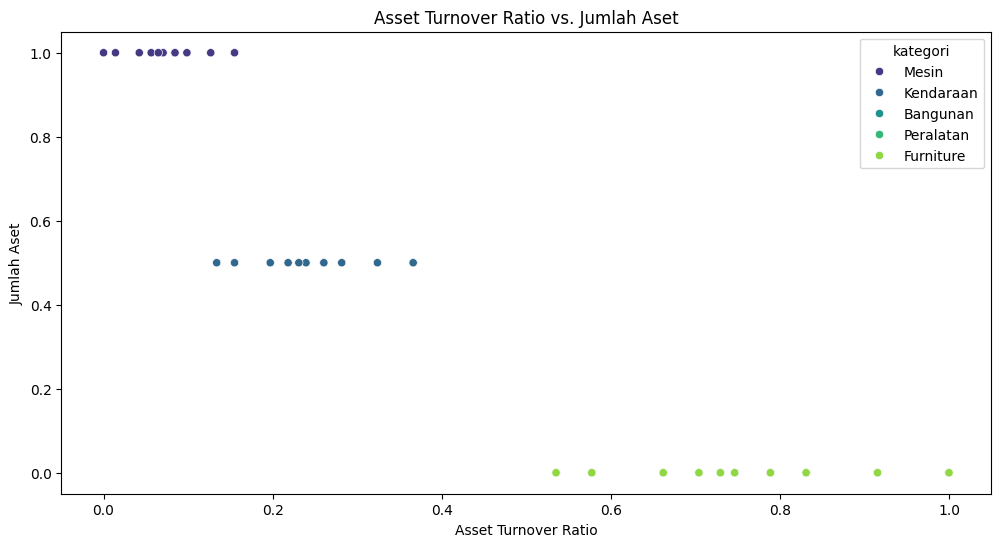

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Matrix Heatmap
numeric_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 2. Time Series Analysis of Revenue
plt.figure(figsize=(12, 6))
sns.lineplot(x='tahun', y='pendapatan', data=df, color='green')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Categorical vs. Numerical Relationships
categorical_cols = ['skenario', 'tax_holiday_status', 'kategori']
numerical_cols = ['pendapatan', 'laba_kotor', 'jumlah_aset']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.boxplot(x=col, y='pendapatan', data=df, palette='Set3')
    plt.title(f'Pendapatan Distribution by {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.boxplot(x=col, y='laba_kotor', data=df, palette='Set3')
    plt.title(f'Laba Kotor Distribution by {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.boxplot(x=col, y='jumlah_aset', data=df, palette='Set3')
    plt.title(f'Jumlah Aset Distribution by {col}')

plt.tight_layout()
plt.show()


# 4. Relationship between Engineered Features and other variables
plt.figure(figsize=(12, 6))
sns.scatterplot(x='profitability_ratio', y='pendapatan', data=df, hue='kategori', palette='viridis')
plt.xlabel('Profitability Ratio')
plt.ylabel('Pendapatan')
plt.title('Profitability Ratio vs. Pendapatan')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='asset_turnover_ratio', y='jumlah_aset', data=df, hue='kategori', palette='viridis')
plt.xlabel('Asset Turnover Ratio')
plt.ylabel('Jumlah Aset')
plt.title('Asset Turnover Ratio vs. Jumlah Aset')
plt.show()

**Reasoning**:
The previous code block generated the visualizations, but there were warnings about the `palette` argument in `sns.boxplot`.  I will fix the warnings by assigning the `x` variable to `hue` and setting `legend=False` as suggested.  I will also re-run the code to generate the corrected figures.



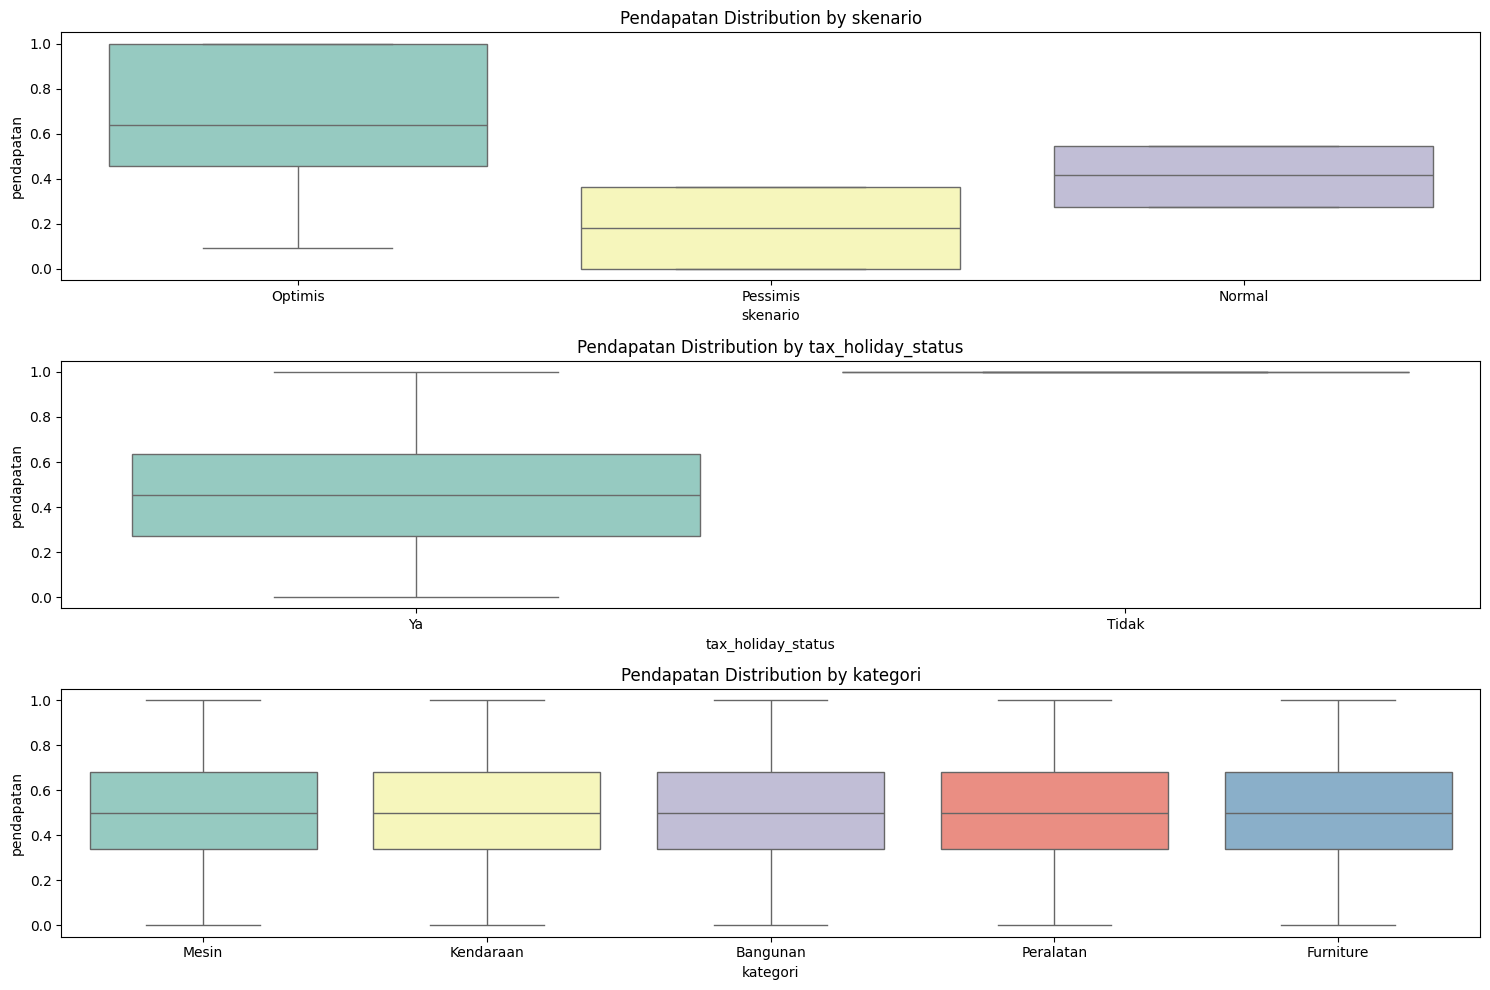

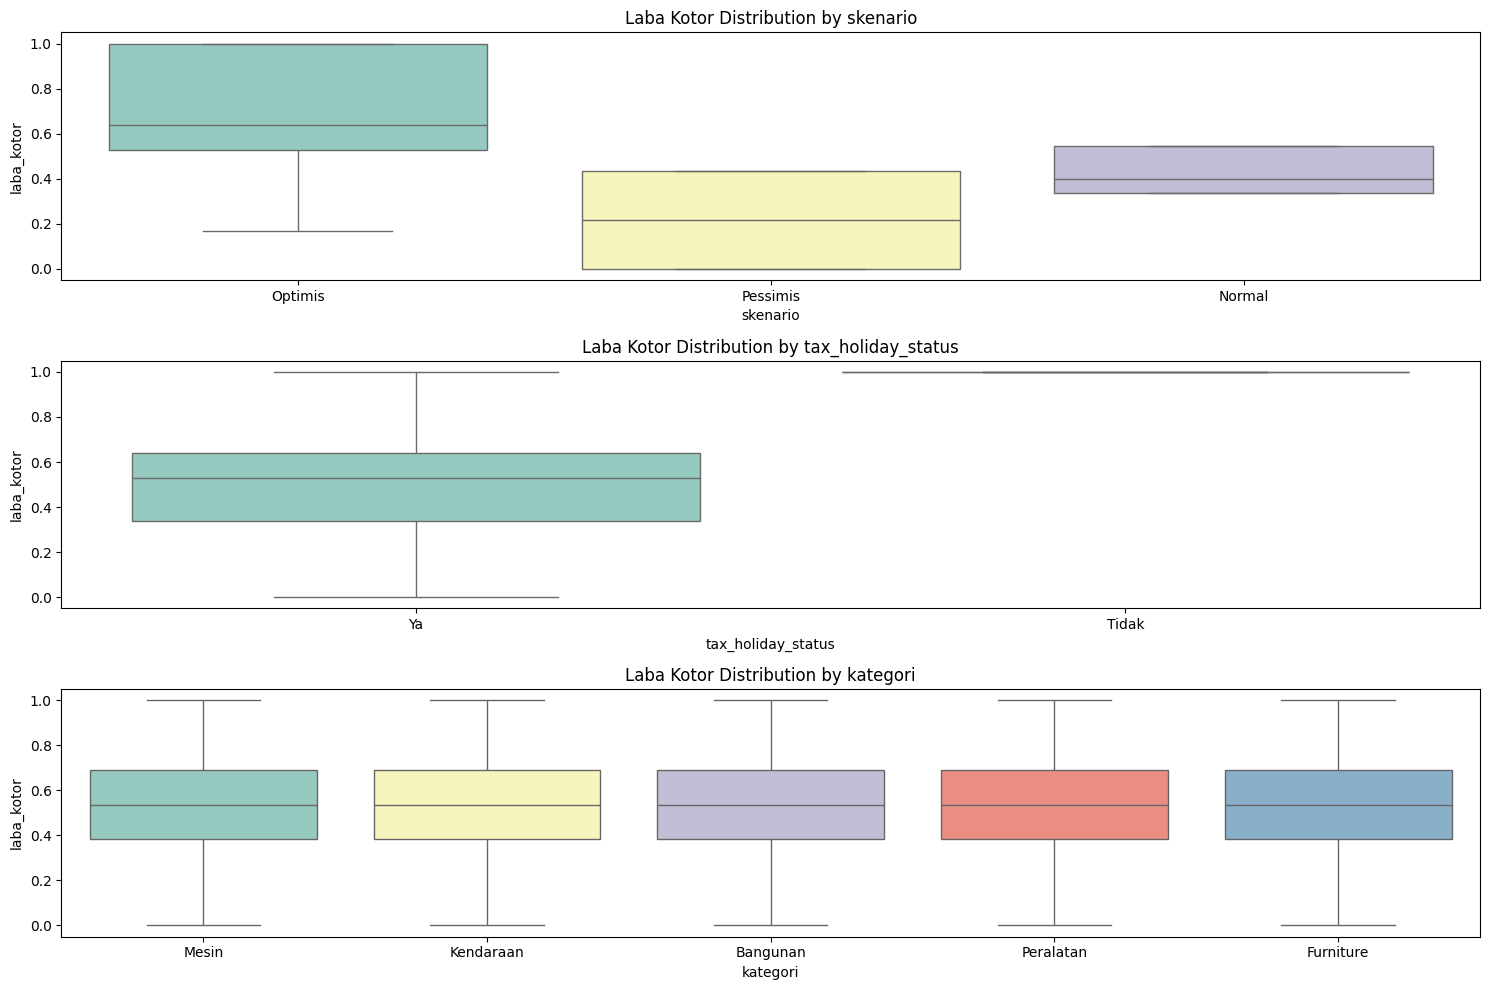

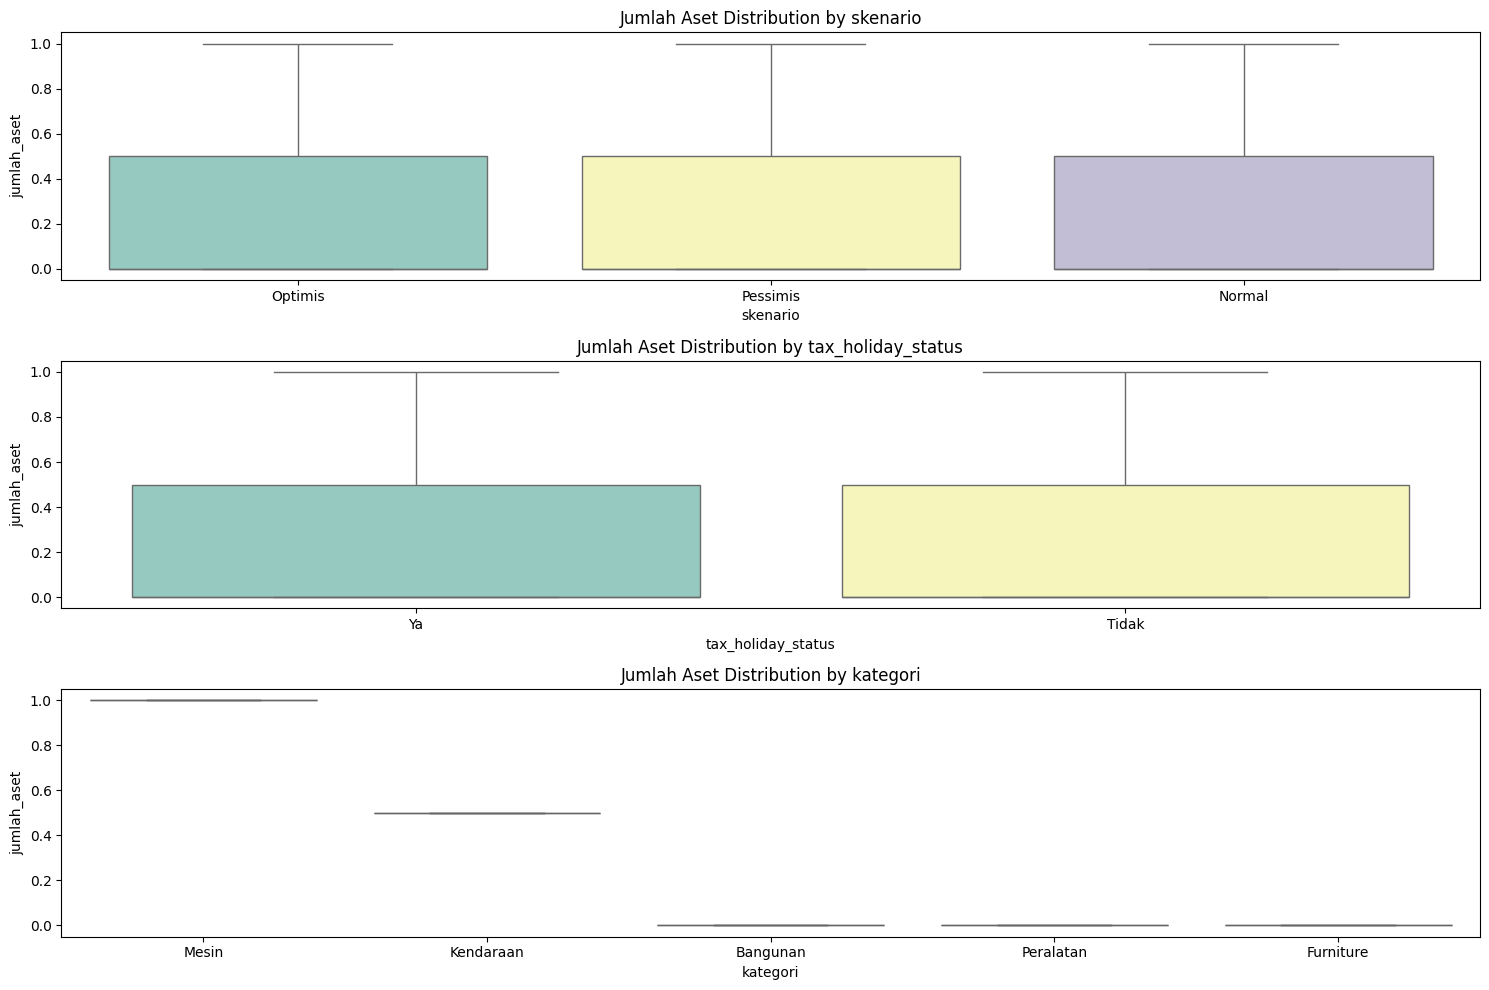

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Matrix Heatmap (already generated correctly)

# 2. Time Series Analysis of Revenue (already generated correctly)


# 3. Categorical vs. Numerical Relationships
categorical_cols = ['skenario', 'tax_holiday_status', 'kategori']
numerical_cols = ['pendapatan', 'laba_kotor', 'jumlah_aset']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.boxplot(x=col, y='pendapatan', data=df, hue=col, palette='Set3', legend=False)
    plt.title(f'Pendapatan Distribution by {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.boxplot(x=col, y='laba_kotor', data=df, hue=col, palette='Set3', legend=False)
    plt.title(f'Laba Kotor Distribution by {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.boxplot(x=col, y='jumlah_aset', data=df, hue=col, palette='Set3', legend=False)
    plt.title(f'Jumlah Aset Distribution by {col}')

plt.tight_layout()
plt.show()


# 4. Relationship between Engineered Features and other variables (already generated correctly)

## Summary:

### Q&A
No questions to answer.

### Data Analysis Key Findings
* **No Missing Values:** The dataset had no missing values, simplifying subsequent analysis.
* **Outliers Handled:** Outliers in `pajak_terutang` and `rata_rata_umur_ekonomis` were replaced with their respective medians.
* **Feature Engineering:** Two new features, `profitability_ratio` and `asset_turnover_ratio`, were engineered to provide insights into profitability and asset utilization.
* **Correlation Analysis:** A correlation matrix heatmap visualized relationships between numerical features.
* **Time Series Analysis:**  Average revenue (`pendapatan`) trend was observed over time.
* **Categorical vs. Numerical Relationships:** Box plots revealed how different categories (`skenario`, `tax_holiday_status`, `kategori`) affected numerical features (`pendapatan`, `laba_kotor`, `jumlah_aset`).
* **Relationships between Engineered Features:** Scatter plots examined relationships between engineered features and other key variables.


### Insights or Next Steps
* Investigate the impact of different `skenario` and `kategori` on financial performance metrics in more detail.  Consider statistical tests to confirm any observed differences.
* Explore potential predictive modeling to forecast revenue or profitability based on the identified relationships and trends.
